COMPETENCIA DE MODELOS

In [4]:
import numpy as np
import pandas as pd
import math as math
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification, make_s_curve
from sklearn.preprocessing import KBinsDiscretizer
#from sklearn.datasets import make_blobs

In [6]:
X_1, y_1 = make_blobs(n_samples=10000, centers=3, cluster_std=1.5, n_features=2, random_state=0)

In [7]:
X_2, y_2 = make_moons(n_samples=10000, noise=.3, random_state=0)

In [8]:
X_3, y_3 = make_circles(n_samples=10000, factor=0.25, noise=0.25)

In [9]:
X_4, y_4 = make_classification(n_samples=100000, n_features=3, n_redundant=0, 
                               n_informative=3, random_state=0, n_clusters_per_class=1, 
                               n_classes=2, class_sep=0.1, weights = [0.99])

In [10]:
X_5, y_5 = make_s_curve(n_samples=10000, noise=0.25, random_state=0)

https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html

In [11]:
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')#Strategy: uniform, quantile

In [12]:
y_5_bins = est.fit_transform(y_5.reshape(-1, 1)).reshape(1, -1)

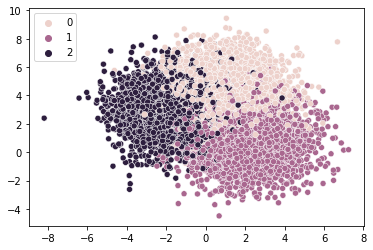

In [13]:
sns.scatterplot(x = X_1[:,0], y = X_1[:,1], hue = y_1)
plt.show()

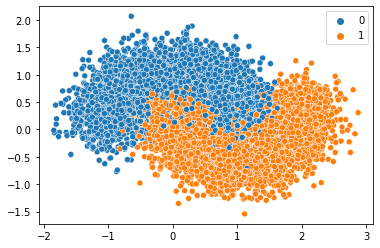

In [14]:
sns.scatterplot(x = X_2[:,0], y = X_2[:,1], hue = y_2)
plt.show()

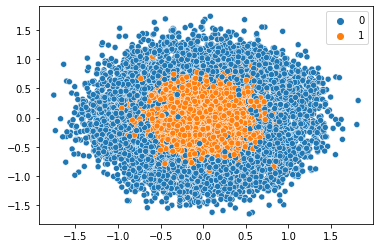

In [15]:
sns.scatterplot(x = X_3[:,0], y = X_3[:,1], hue = y_3)
plt.show()

In [16]:
from mpl_toolkits.mplot3d import Axes3D

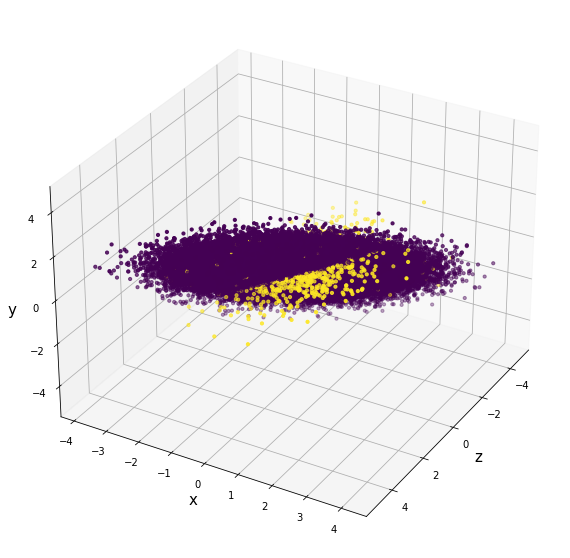

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('z', fontsize=15)
ax.set_ylabel('x', fontsize=15)
ax.set_zlabel('y', fontsize=15)
ax.scatter(X_4[:,0], X_4[:,1], X_4[:,2], s=10, c=y_4)

ax.view_init(30, 30)
plt.show()

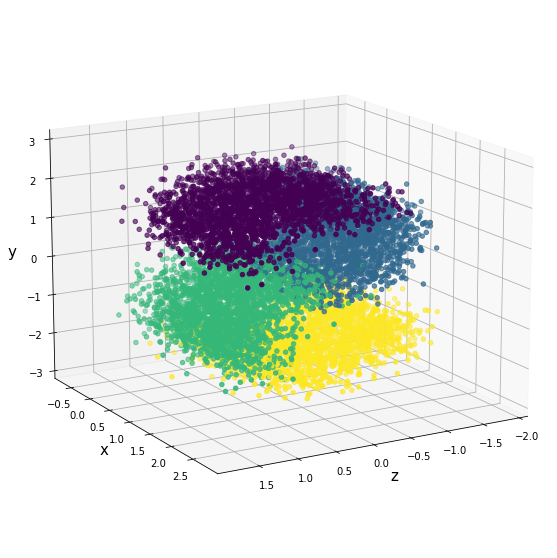

In [18]:
# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('z', fontsize=15)
ax.set_ylabel('x', fontsize=15)
ax.set_zlabel('y', fontsize=15)
ax.scatter(X_5[:,0], X_5[:,1], X_5[:,2], s=20, c=y_5_bins)

ax.view_init(15, 60)
plt.show()

**Ejercicio 1**

CONSIGNA:

1. Utilizando GridSearch + Validación cruzada, emplear un árbol de decisión para resolver los conjuntos de datos sintéticos.

In [19]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

CONSIGNA:

1. Utilizando GridSearch + Validación cruzada, emplear k-vecinos para resolver los conjuntos de datos sintéticos.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

CONSIGNA:

1. Utilizando GridSearch + Validación cruzada, emplear Naive Bayes para resolver los conjuntos de datos sintéticos.

In [21]:
from sklearn.naive_bayes import GaussianNB

**Ejercicio 2**

CONSIGNA:

1. Utilizar VotingClassifier para quedarse con la mejor predicción ante cada uno de los conjuntos de datos.

In [22]:
from sklearn.ensemble import VotingClassifier

**Ejercicio 3**

Sobre el conjunto de datos número 4, podemos ver que es un conjunto desbalanceado, ya que una de las clases tienen una presencia muy inferior, de un 1.46%

In [23]:
print(y_4.sum())
print(y_4.sum()/y_4.size)

1462
0.01462


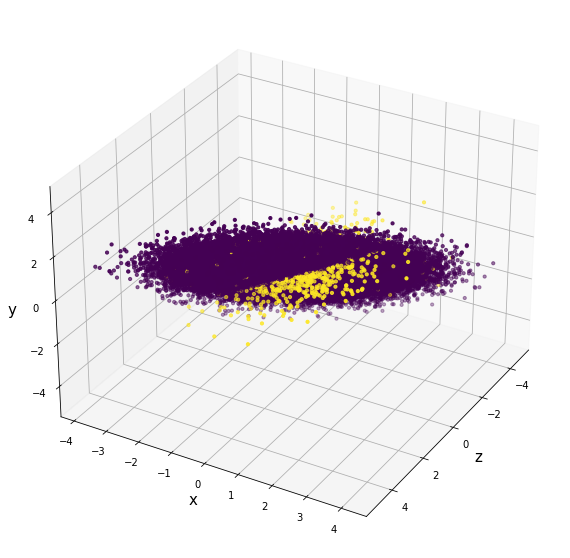

In [24]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('z', fontsize=15)
ax.set_ylabel('x', fontsize=15)
ax.set_zlabel('y', fontsize=15)
ax.scatter(X_4[:,0], X_4[:,1], X_4[:,2], s=10, c=y_4)

ax.view_init(30, 30)
plt.show()

CONSIGNA:

1. Mostrar la matriz de confusión obtenida por cada uno de los clasificadores
2. Aplicar alguna técnica para mejorar la métrica de exhaustividad (Recall)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

Los modelos no detectan bien la clase minoritaria, para mejorar esto se puede:
1. Aumentar la cantidad de muestras de la clase minoritaria, o quitar muestras de la clase mayoritaria
2. Reentrenar los modelos, haciendo énfasis en la métrica buscada